# 시계열자료분석

## CH02 추세모형 -1

### 패키지 설치

In [36]:
install.packages("lmtest")
install.packages("ggplot2")
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [37]:
library(lmtest)
library(ggplot2)
library(lubridate)

In [38]:
options(repr.plot.width=15,repr.plot.height=8)

### 국내총인구

In [39]:
z=scan("population.txt")
head(z)

[1] 25012374 25765673 26513030 27261747 27984155 28704674

In [40]:
tmp.data=data.frame(
    day=seq(ymd("1960-01-01"),by='year',length.out=length(z)),
    pop=round(z/10000),
    t=1:length(z),
    t2=(1:length(z))^2
)
head(tmp.data)

,day,pop,t,t2
,<date>,<dbl>,<int>,<dbl>
1,1960-01-01,2501,1,1
2,1961-01-01,2577,2,4
3,1962-01-01,2651,3,9
4,1963-01-01,2726,4,16
5,1964-01-01,2798,5,25
6,1965-01-01,2870,6,36


### 시도표그리기

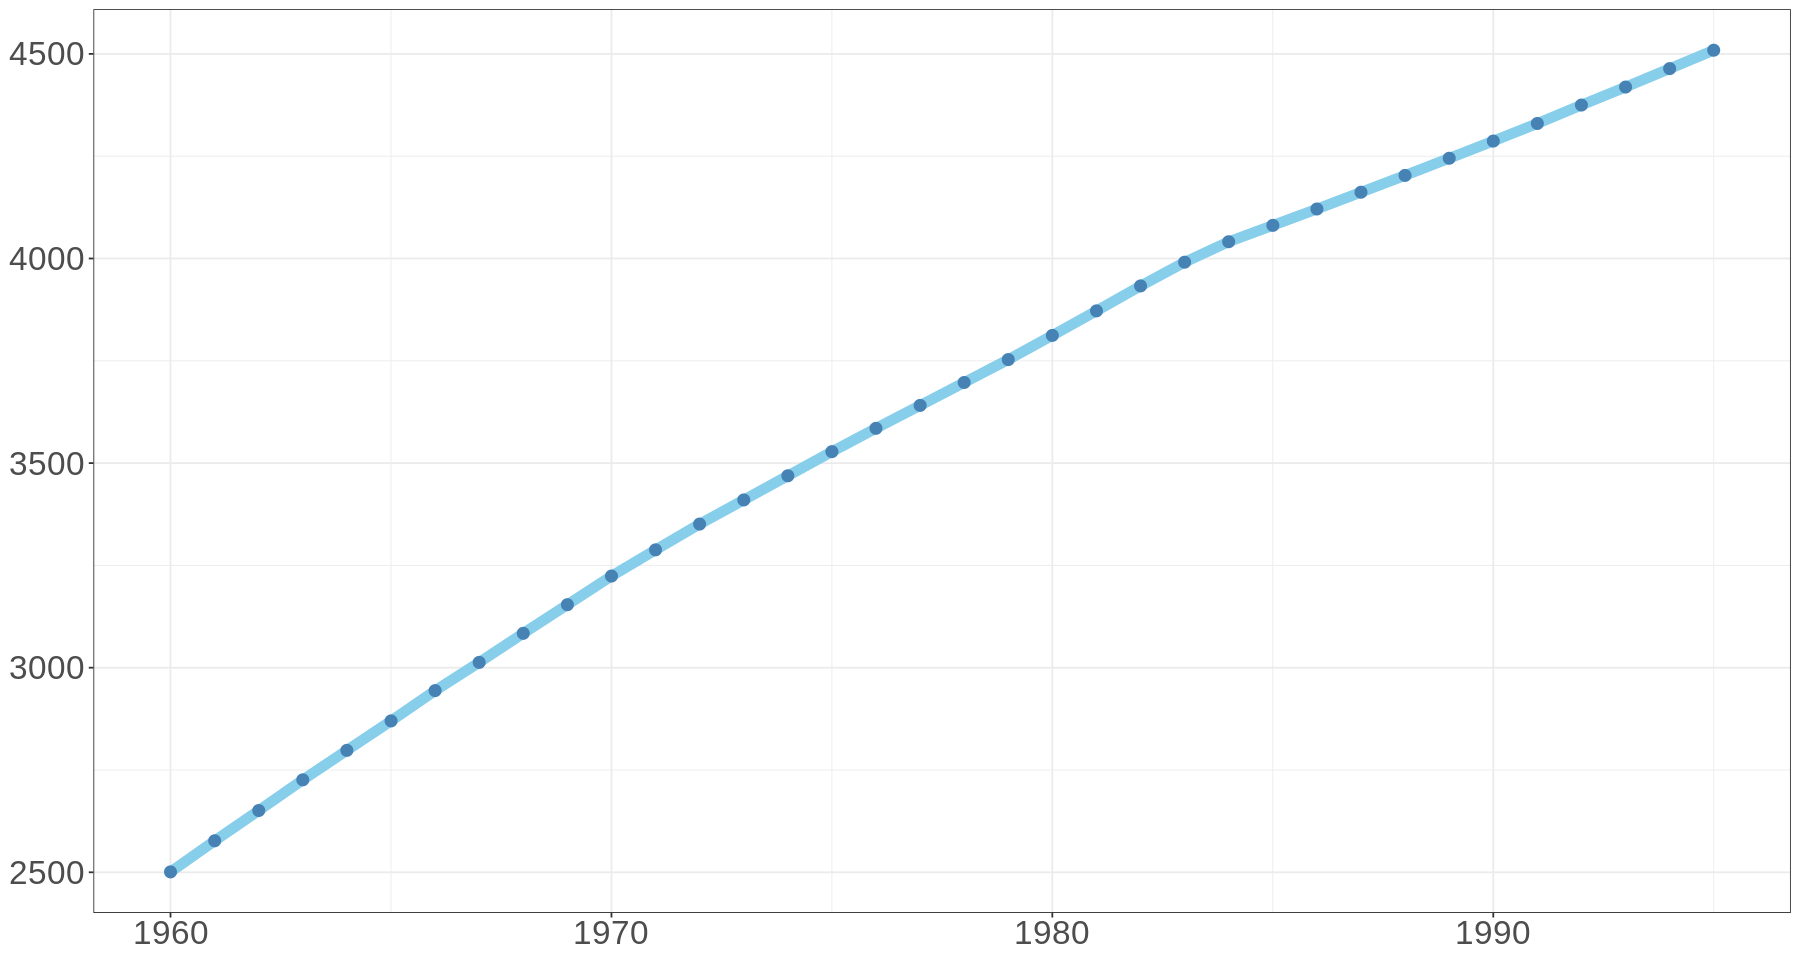

In [41]:
ggplot(tmp.data,aes(day,pop))+
  geom_line(col='skyblue',lwd=3)+
  geom_point(col='steelblue',cex=3 )+
  theme_bw()+
  theme(axis.title=element_blank(),
        axis.text=element_text(size=20))

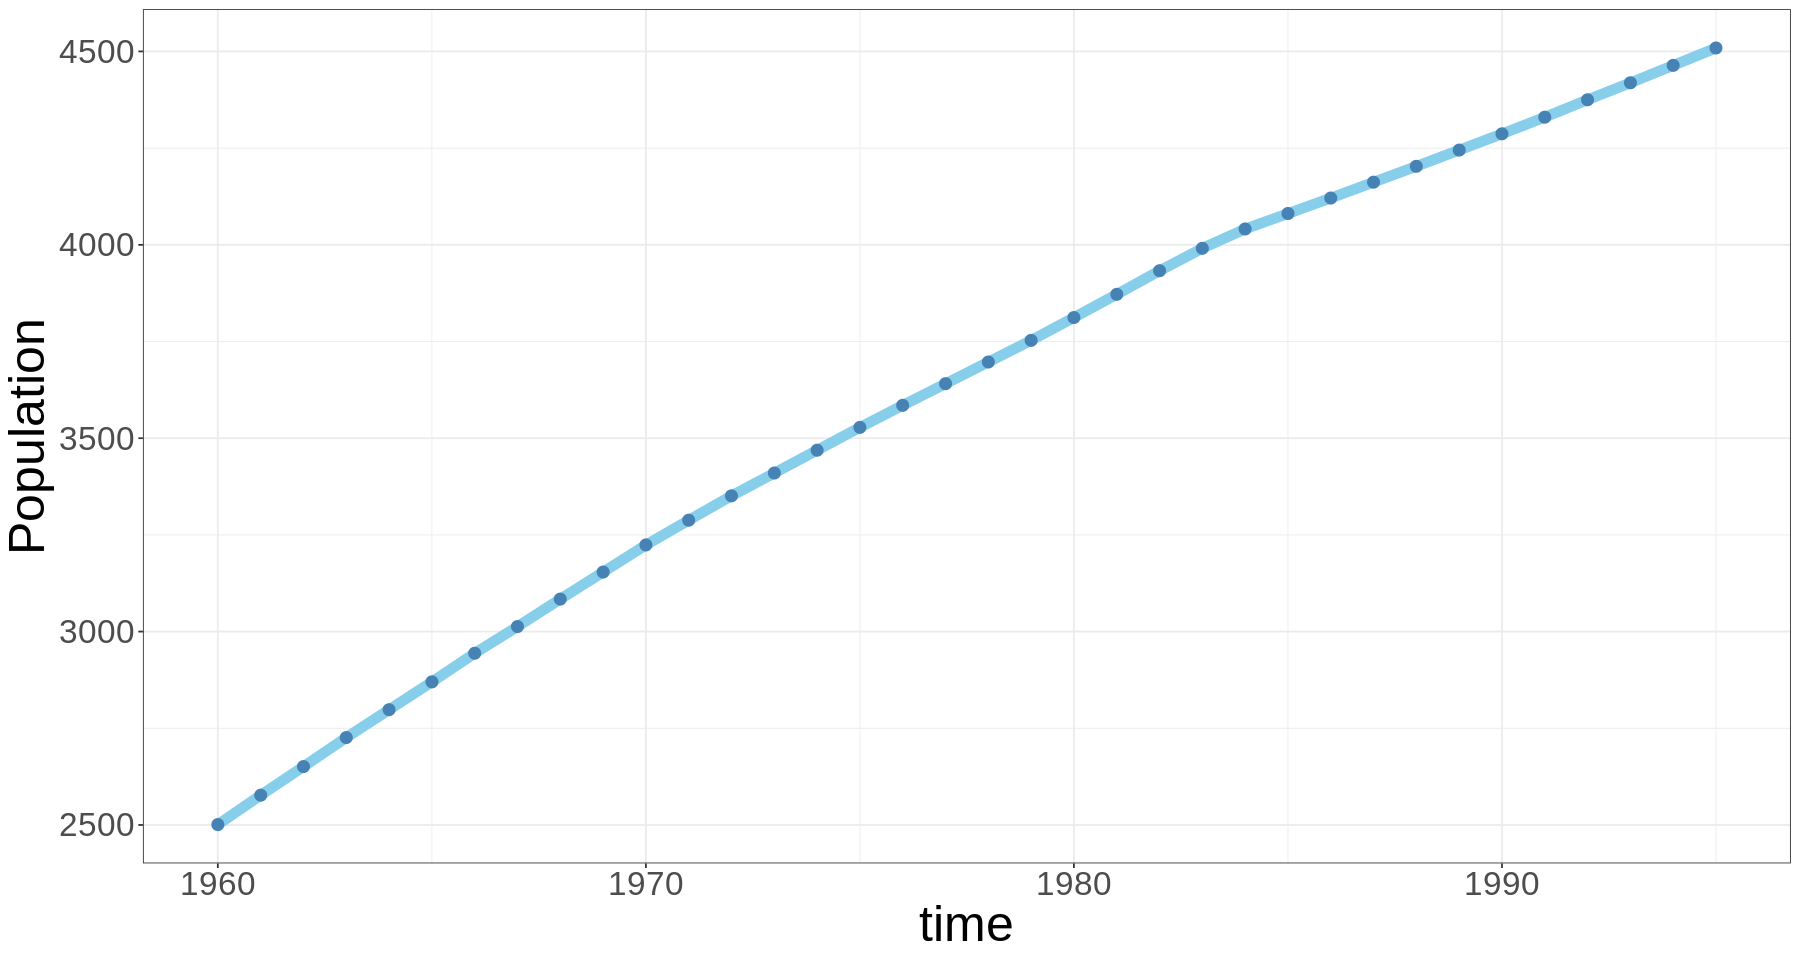

In [42]:
ggplot(tmp.data,aes(day,pop))+
  geom_line(col='skyblue',lwd=3)+
  geom_point(col='steelblue',cex=3 )+
  xlab("time")+ylab("Population")+
  theme_bw()+
  theme(axis.title=element_text(size=30),
        axis.text=element_text(size=20))

### 1차 선형 추세 모형
모형 : $$Z_t=β_0+β_1t+ϵ_t,t=1,2,...,n$$

In [43]:
m1=lm(pop~t,data=tmp.data)
summary(m1)


Call:
lm(formula = pop ~ t, data = tmp.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-115.40  -48.30   16.87   54.37   63.29 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2559.3889    20.0385  127.72   <2e-16 ***
t             57.0135     0.9444   60.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 58.87 on 34 degrees of freedom
Multiple R-squared:  0.9908,	Adjusted R-squared:  0.9905 
F-statistic:  3644 on 1 and 34 DF,  p-value: < 2.2e-16


integer(0)

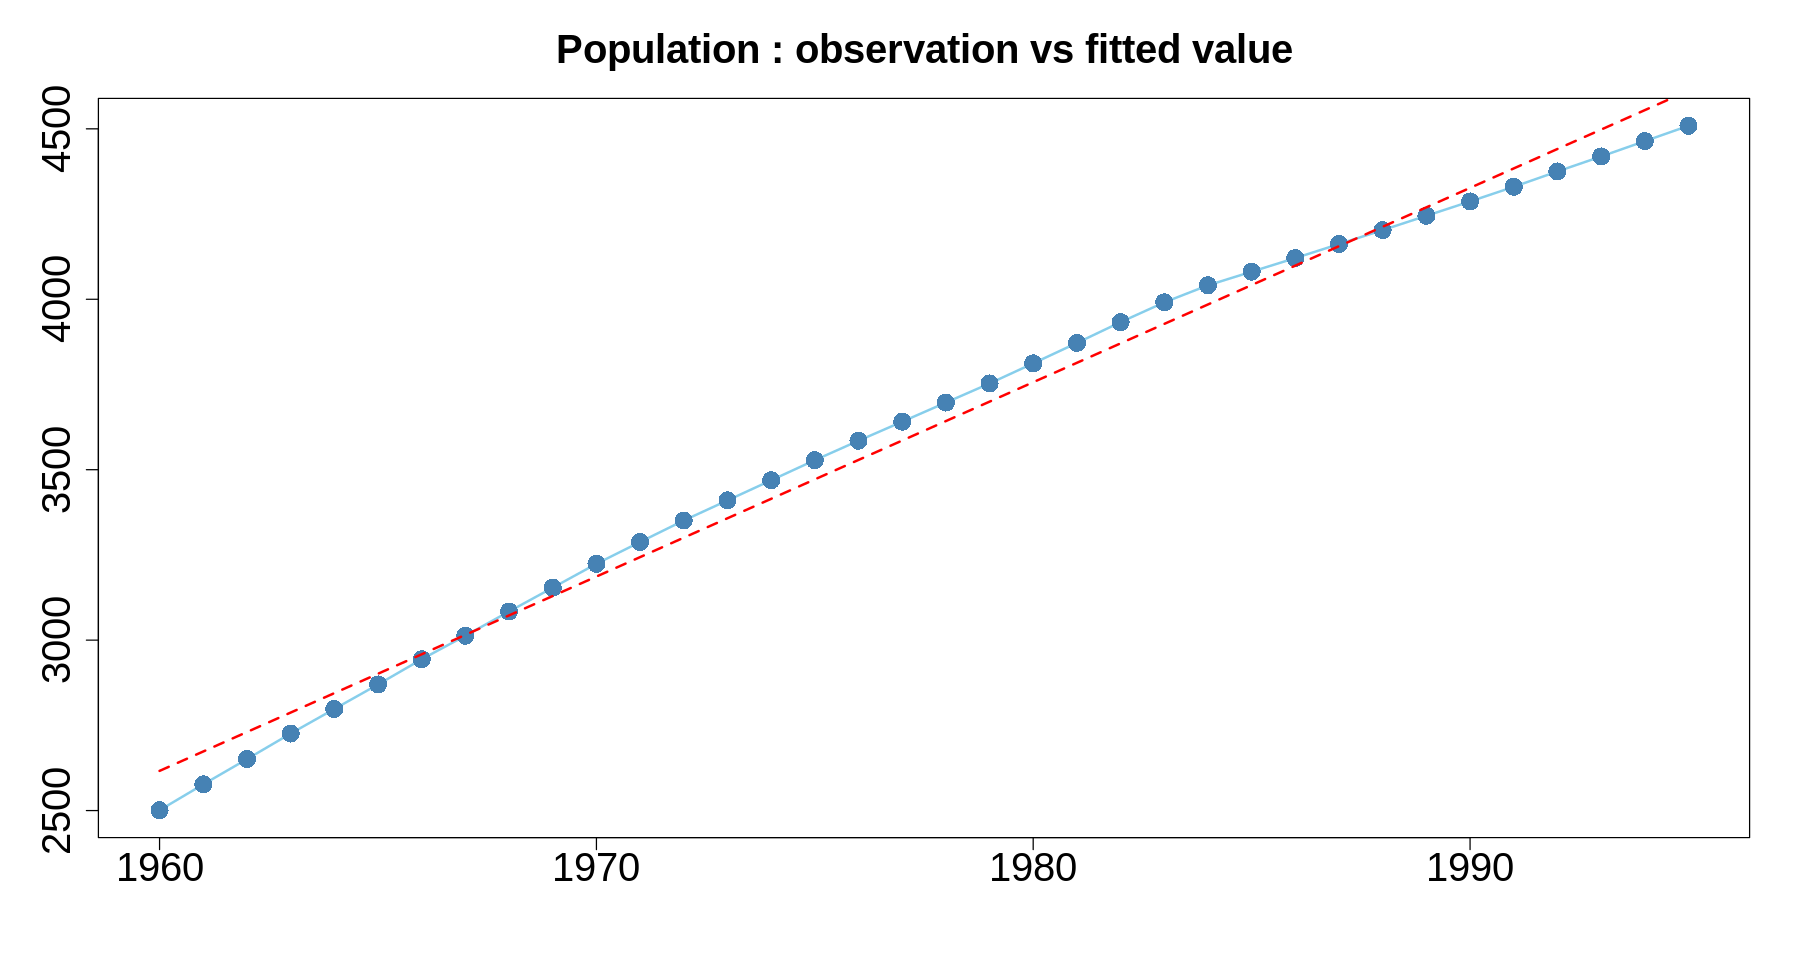

In [44]:
plot(pop~day,tmp.data,
    main="Population : observation vs fitted value",
    xlab="",ylab="",
    type="l",
    col="skyblue",
    lwd=2,cex.axis=2,cex.main=2)+
points(pop~day,tmp.data,col="steelblue",cex=2,pch=16)+
lines(tmp.data$day,fitted(m1),col="red",lty=2,lwd=2)

### 잔차분석

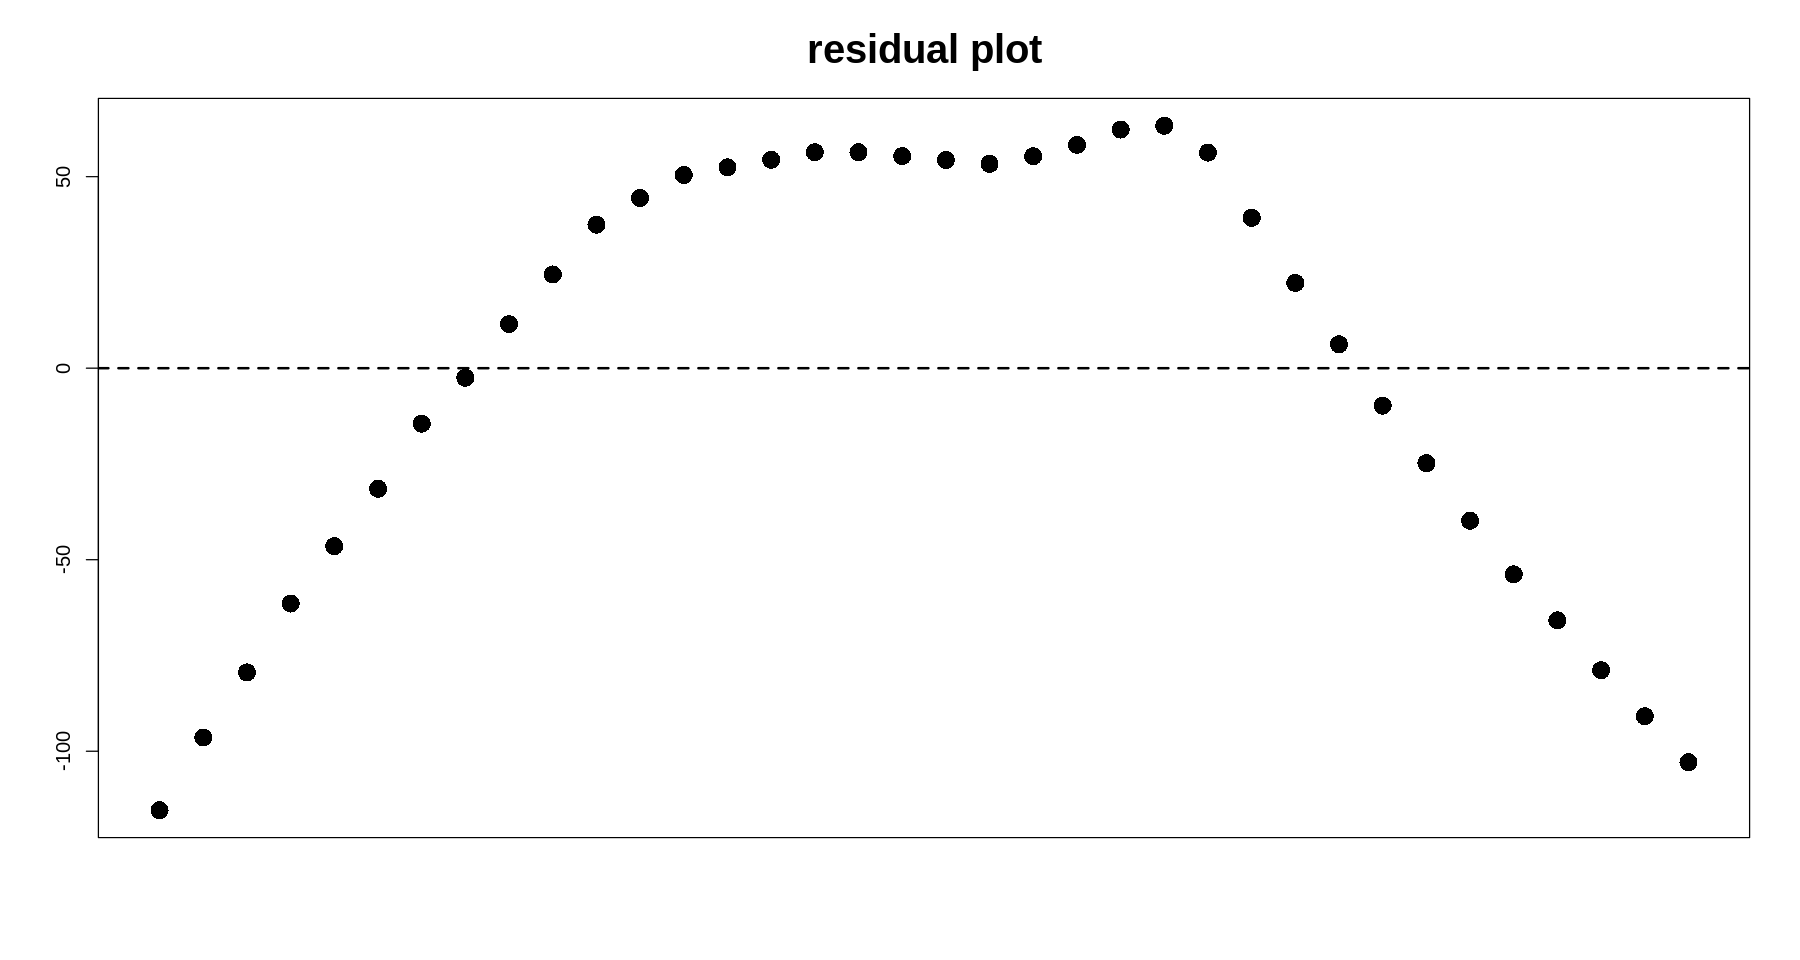

In [45]:
plot(tmp.data$day,resid(m1),pch=16,cex=2,xaxt='n',
    xlab="",ylab="",main="residual plot",cex.main=2)
abline(h=0,lty=2,lwd=2)

- 독립성 검정 : DW test

In [46]:
dwtest(m1) ##회귀모형 검정


	Durbin-Watson test

data:  m1
DW = 0.041645, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


In [47]:
dwtest(m1,alternative="two.sided") ##양측검정


	Durbin-Watson test

data:  m1
DW = 0.041645, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


In [48]:
dwtest(m1,alternative="less")


	Durbin-Watson test

data:  m1
DW = 0.041645, p-value = 1
alternative hypothesis: true autocorrelation is less than 0


- 정규분포 검정 (shapiro-wilk test)

가설 : $H_0$ : 정규분포를 따른다. vs $H_1$ : 정규분포를 따르지 않는다

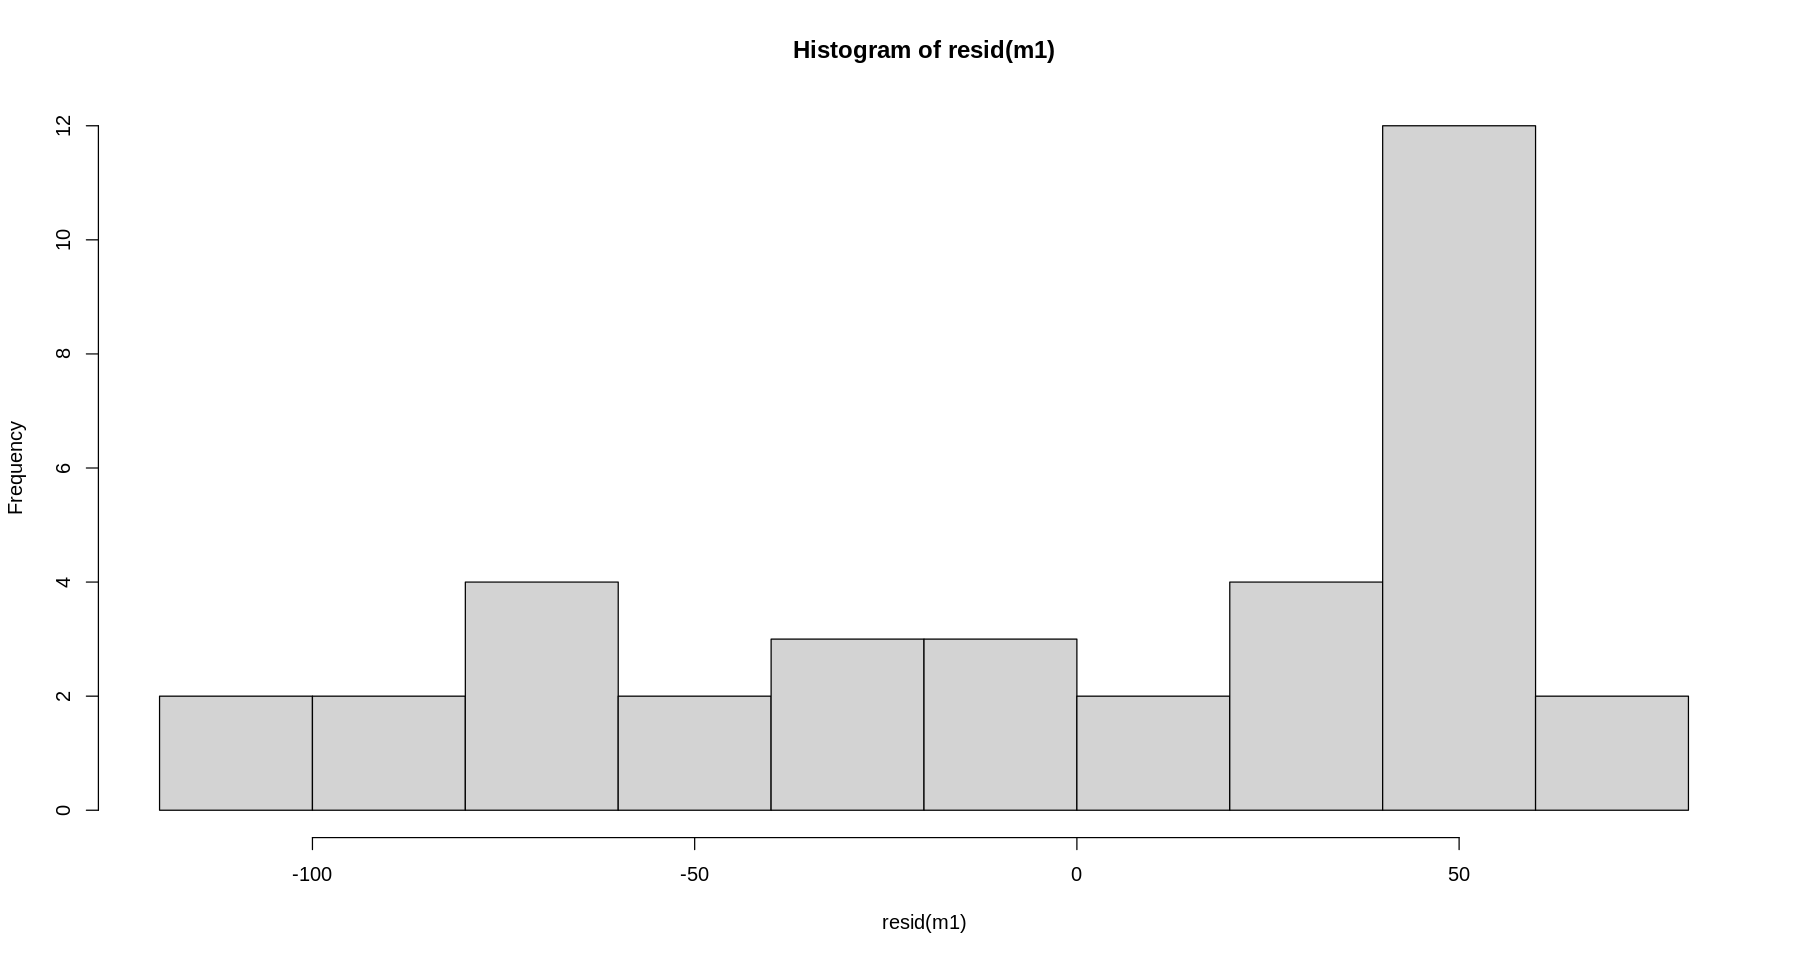

In [49]:
hist(resid(m1)) ##잔차에 대한 히스토그램

In [50]:
shapiro.test(resid(m1)) ##H_0 : 정규분포를 따른다. shapiro검정은 잔차를 넣어주어야 함!


	Shapiro-Wilk normality test

data:  resid(m1)
W = 0.87284, p-value = 0.000669


`-` p-value 값이 매우 작으므로 기각!

- 등분산성 검정 (Breusch-Pagen test)

가설 : $H_0$: 등분산 vs $H_1$: 이분산

In [51]:
bptest(m1) ##bptest는 모형을 넣어줌


	studentized Breusch-Pagan test

data:  m1
BP = 0.0059664, df = 1, p-value = 0.9384


### 2차 선형 추세
모형 :$$Z_t=β_0+β_1t+β_2t^2+ϵ_t,t=1,2,...,n$$

In [52]:
m2=lm(pop~t+t2,data=tmp.data) ##or lm(pop~t+I(t^2),data=tmp.data)로 2차모형을 넣어줄수 있음!
summary(m2)


Call:
lm(formula = pop ~ t + t2, data = tmp.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.365  -4.779  -1.049   3.798  17.631 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2421.49090    4.05820  596.69   <2e-16 ***
t             78.78688    0.50576  155.78   <2e-16 ***
t2            -0.58847    0.01326  -44.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.67 on 33 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 1.083e+05 on 2 and 33 DF,  p-value: < 2.2e-16


integer(0)

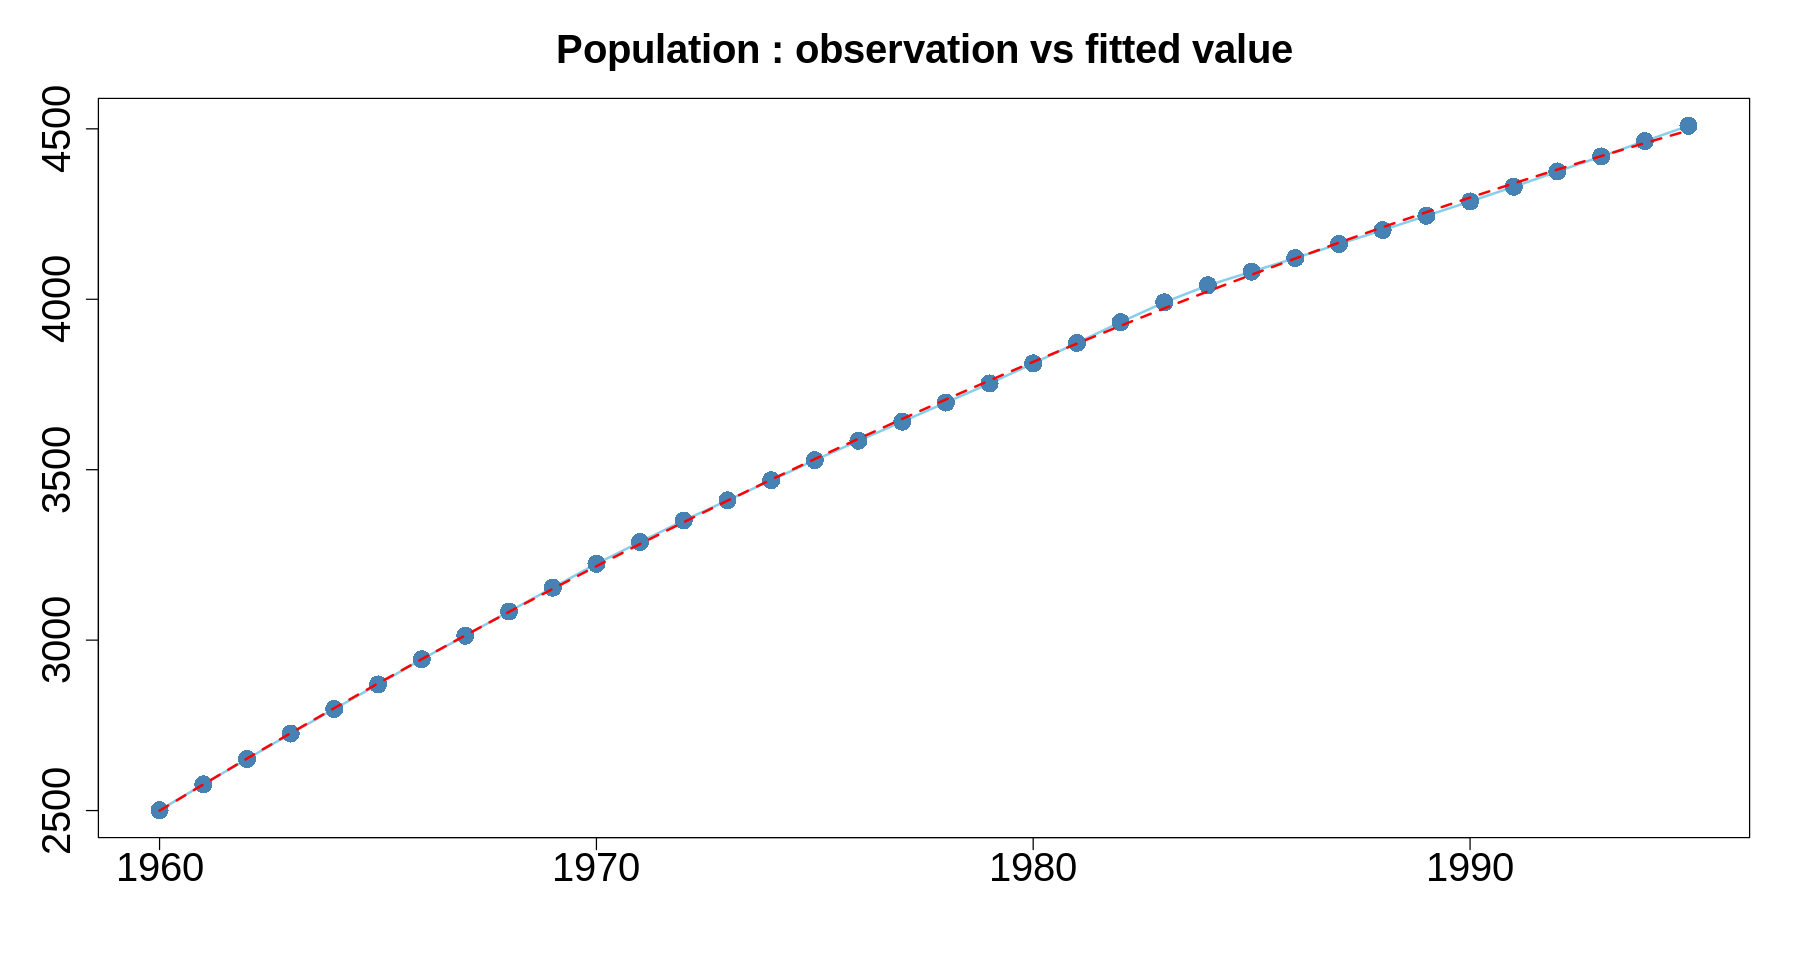

In [53]:
plot(pop~day,tmp.data,
    main="Population : observation vs fitted value",
    xlab="",ylab="",
    type="l",
    col="skyblue",
    lwd=2,cex.axis=2,cex.main=2)+
      points(pop~day,tmp.data,col="steelblue",cex=2,pch=16)+
      lines(tmp.data$day,fitted(m2),col="red",lty=2,lwd=2)

### 잔차분석

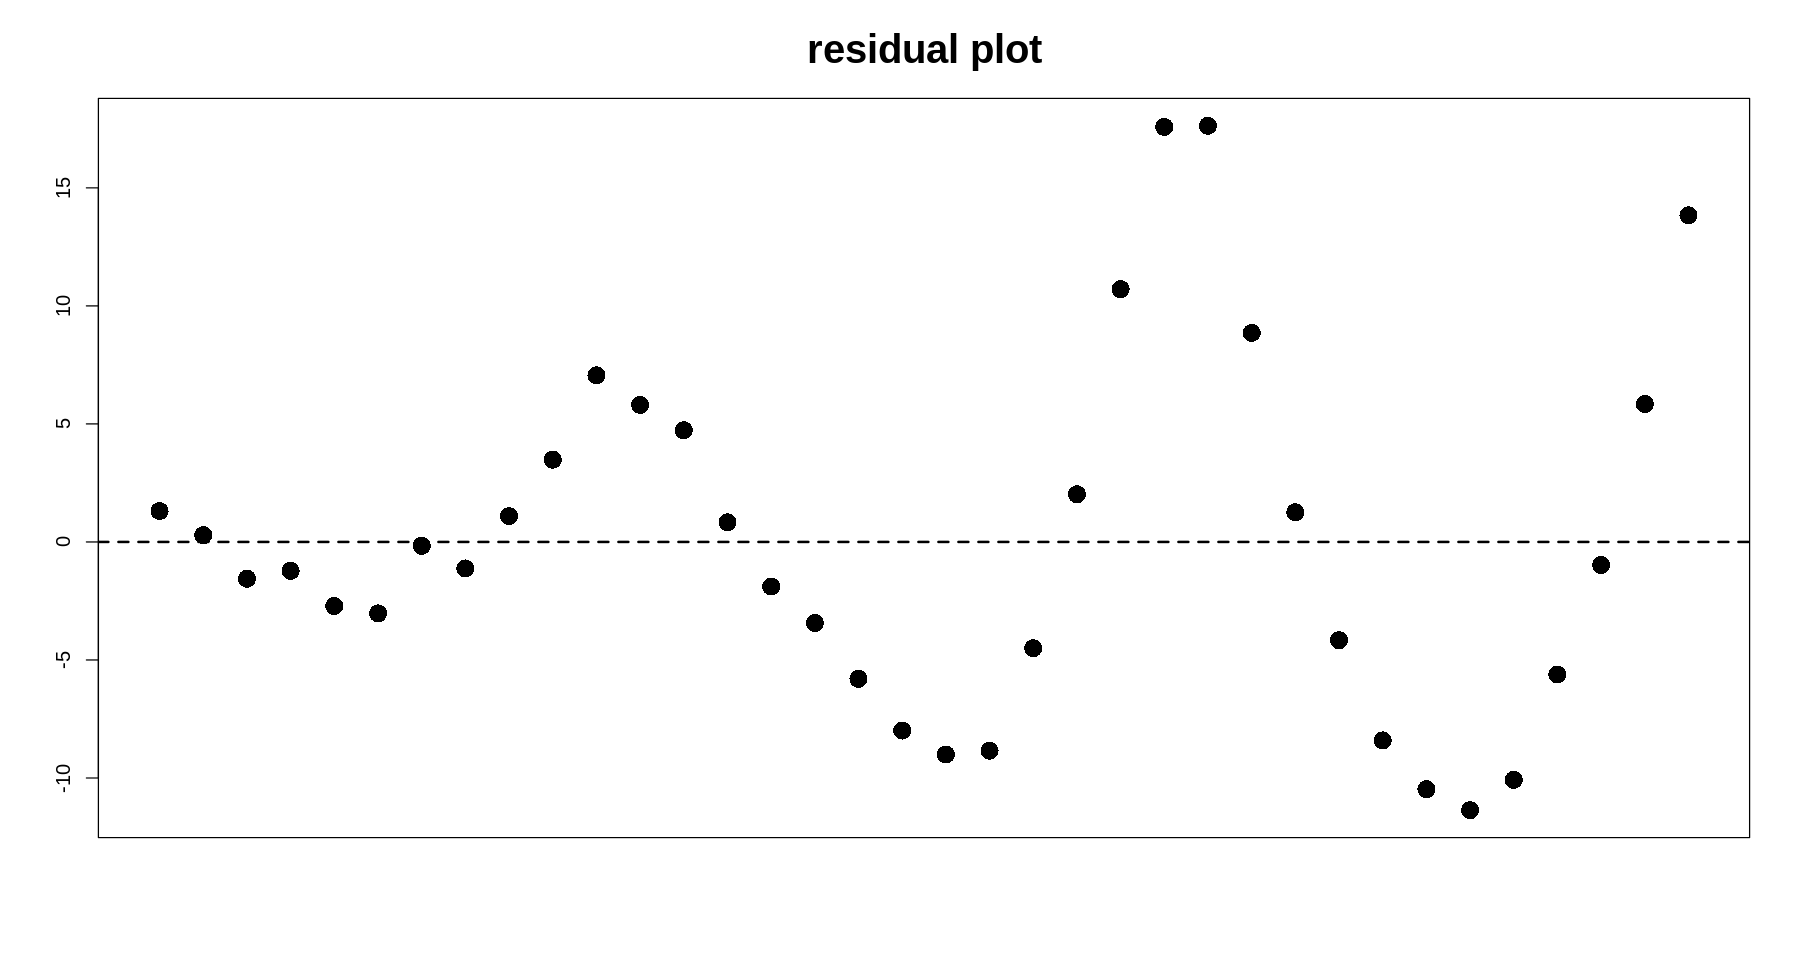

In [54]:
plot(tmp.data$day,resid(m2),
    pch=16,cex=2,xaxt="n",
    xlab="",ylab="",main="residual plot",cex.main=2)
abline(h=0,lty=2,lwd=2)

- 독립성 검정 (DW test)

In [55]:
dwtest(m2,alternative="two.sided")


	Durbin-Watson test

data:  m2
DW = 0.31083, p-value = 1.744e-13
alternative hypothesis: true autocorrelation is not 0


In [56]:
dwtest(m2,alternative="greater")


	Durbin-Watson test

data:  m2
DW = 0.31083, p-value = 8.72e-14
alternative hypothesis: true autocorrelation is greater than 0


- 정규성 검정

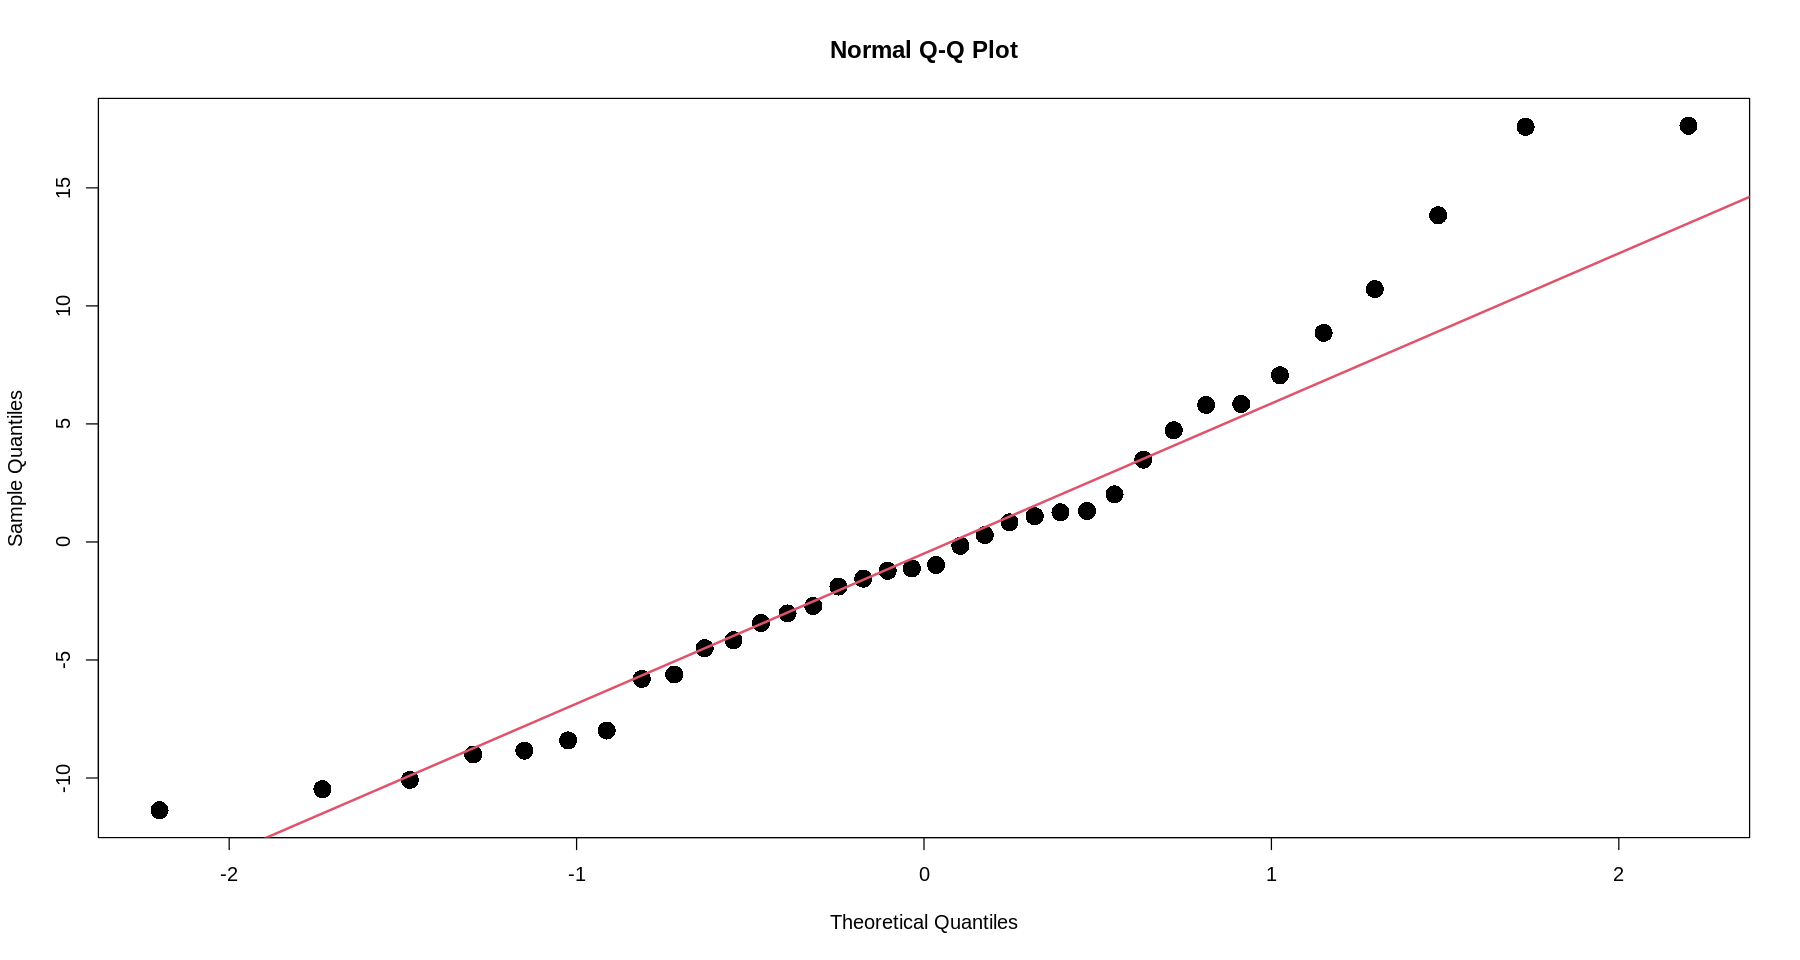

In [57]:
qqnorm(resid(m2),pch=16,cex=2)
qqline(resid(m2),col=2,lwd=2)

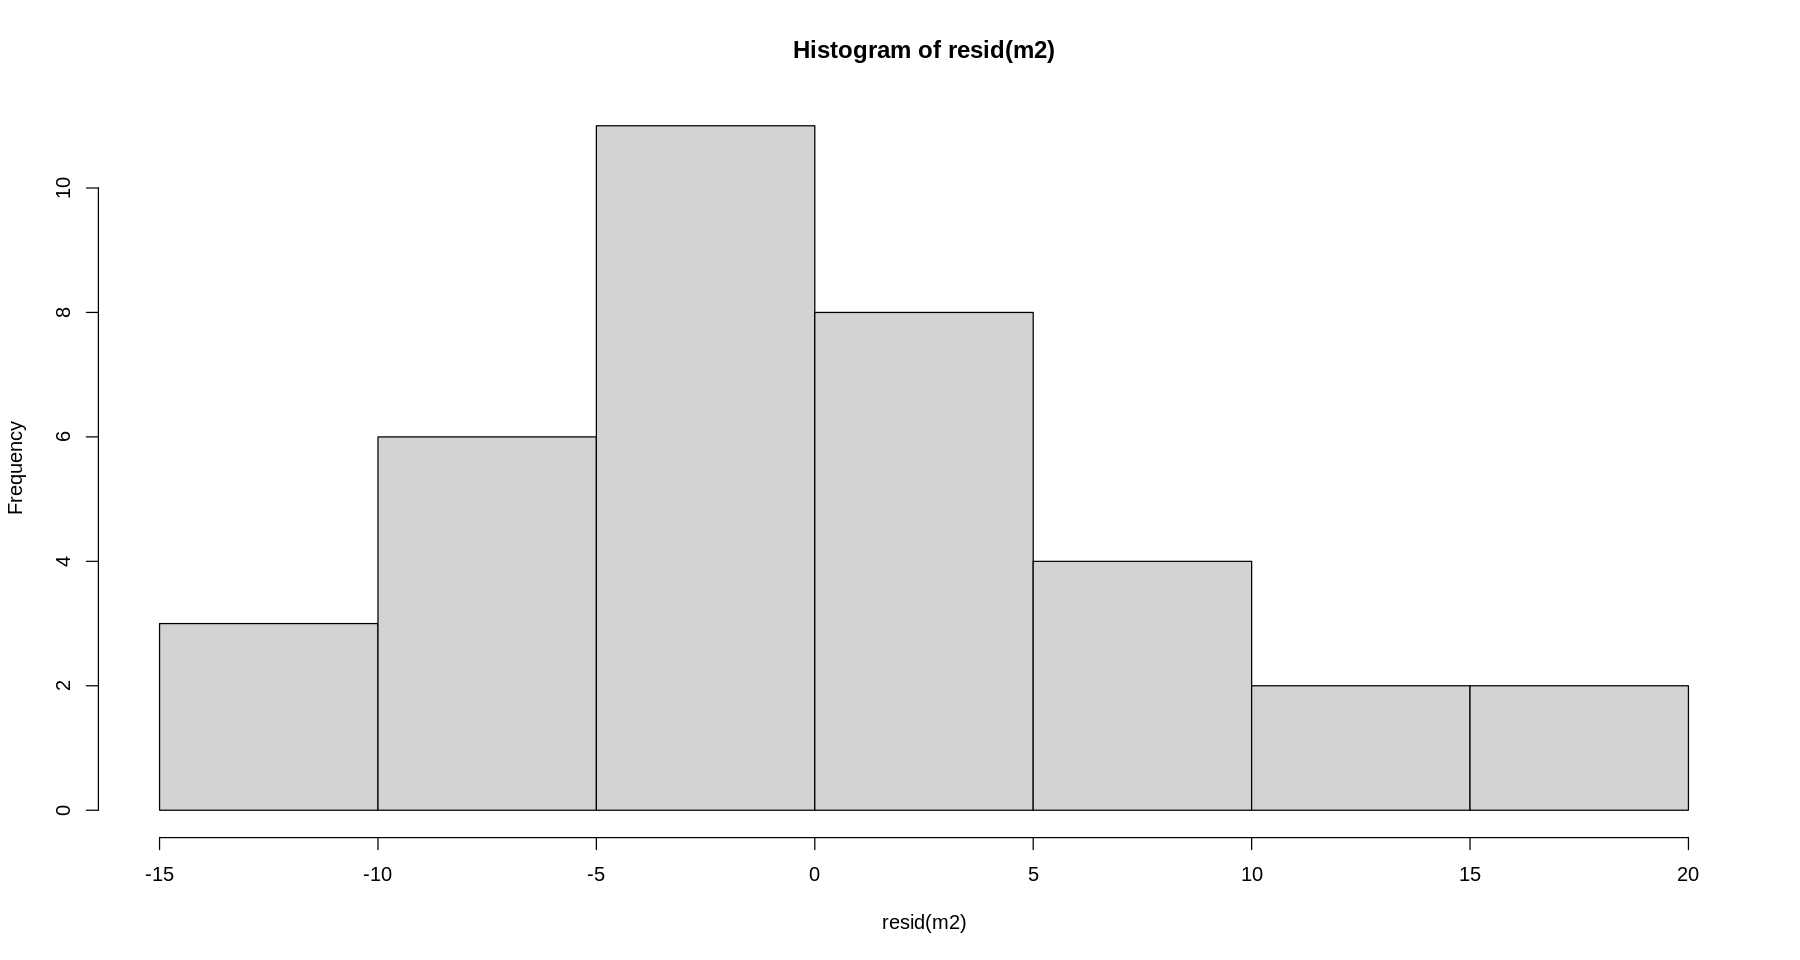

In [58]:
hist(resid(m2))

In [59]:
shapiro.test(resid(m2)) ##shapiro_wilk test


	Shapiro-Wilk normality test

data:  resid(m2)
W = 0.94947, p-value = 0.1007


- 등분산성 검정

In [60]:
bptest(m2)


	studentized Breusch-Pagan test

data:  m2
BP = 8.2455, df = 2, p-value = 0.0162


### 로그변환 후 2차 추세
모형 :$$ln(Z_t)=β_0+β_1t+β_2t^2+ϵ_t,t=1,2,...,n$$

In [61]:
m3=lm(log(pop)~t+t2,data=tmp.data)
summary(m3)


Call:
lm(formula = log(pop) ~ t + t2, data = tmp.data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009306 -0.003520 -0.000374  0.003284  0.010159 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.807e+00  2.360e-03 3307.25   <2e-16 ***
t            2.740e-02  2.942e-04   93.14   <2e-16 ***
t2          -3.004e-04  7.712e-06  -38.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004461 on 33 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9993 
F-statistic: 2.664e+04 on 2 and 33 DF,  p-value: < 2.2e-16


integer(0)

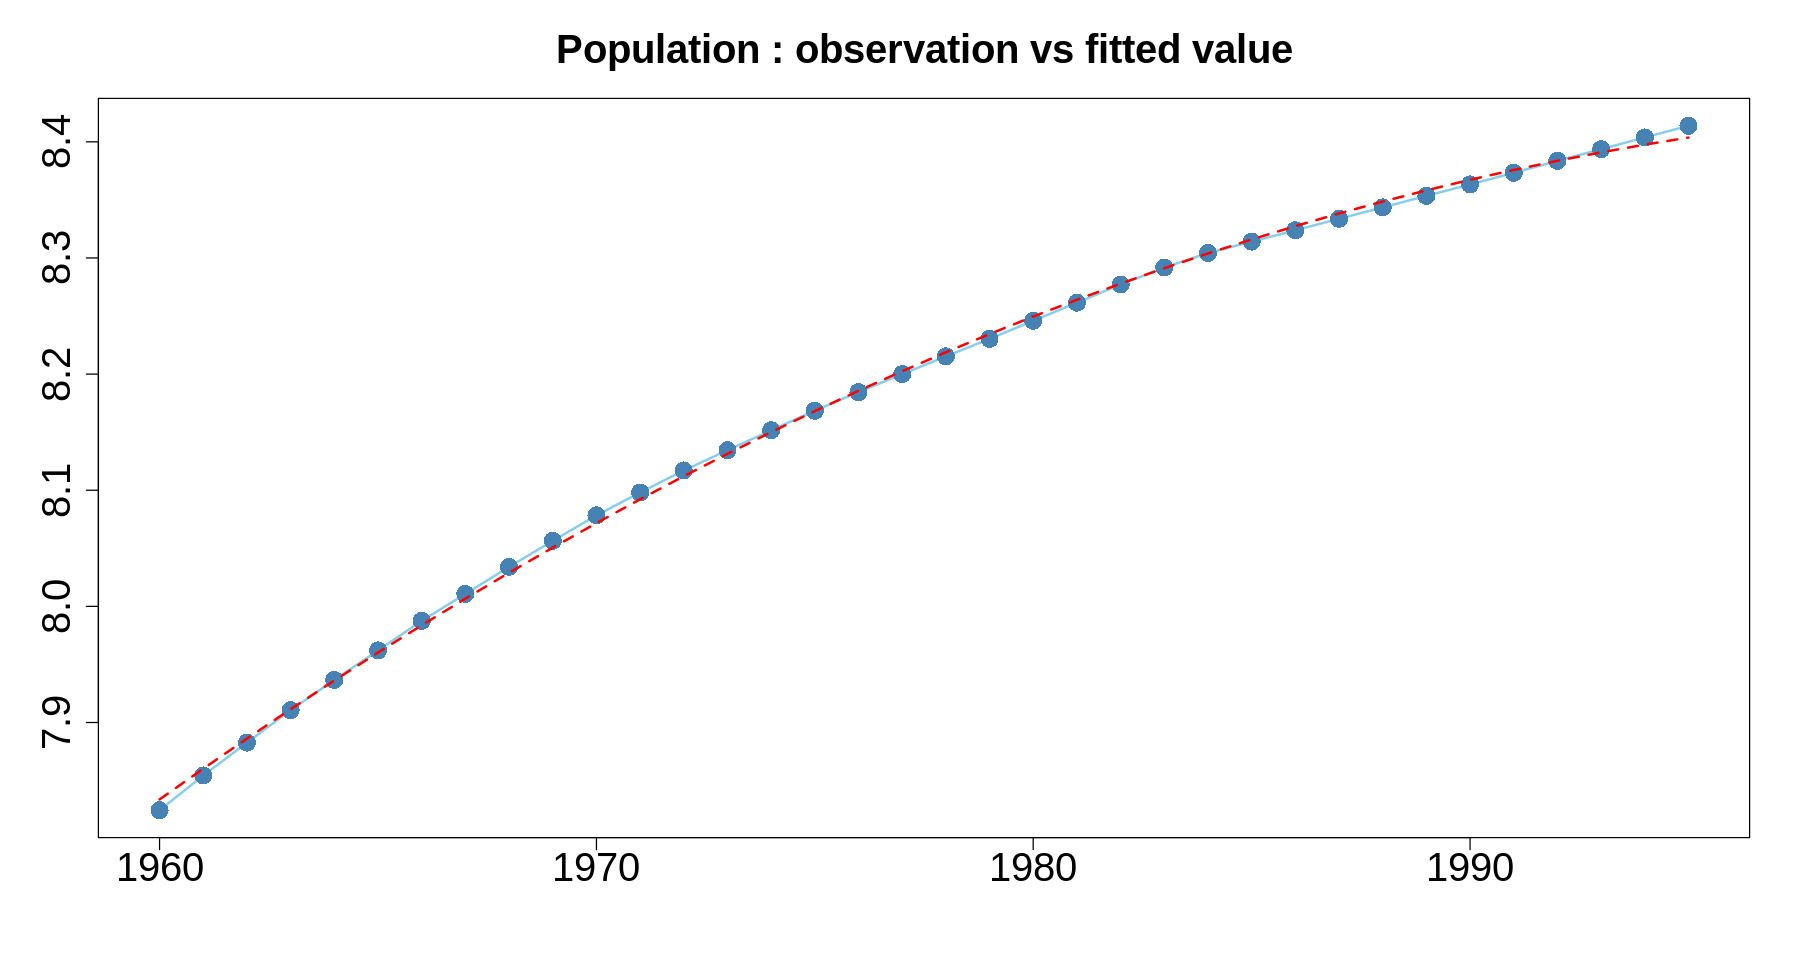

In [62]:
plot(log(pop)~day,tmp.data,
    main="Population : observation vs fitted value",
    xlab="",ylab="",
    type="l",
    col="skyblue",
    lwd=2,cex.axis=2,cex.main=2)+
      points(log(pop)~day,tmp.data,col="steelblue",cex=2,pch=16)+
      lines(tmp.data$day,fitted(m3),col="red",lty=2,lwd=2)

integer(0)

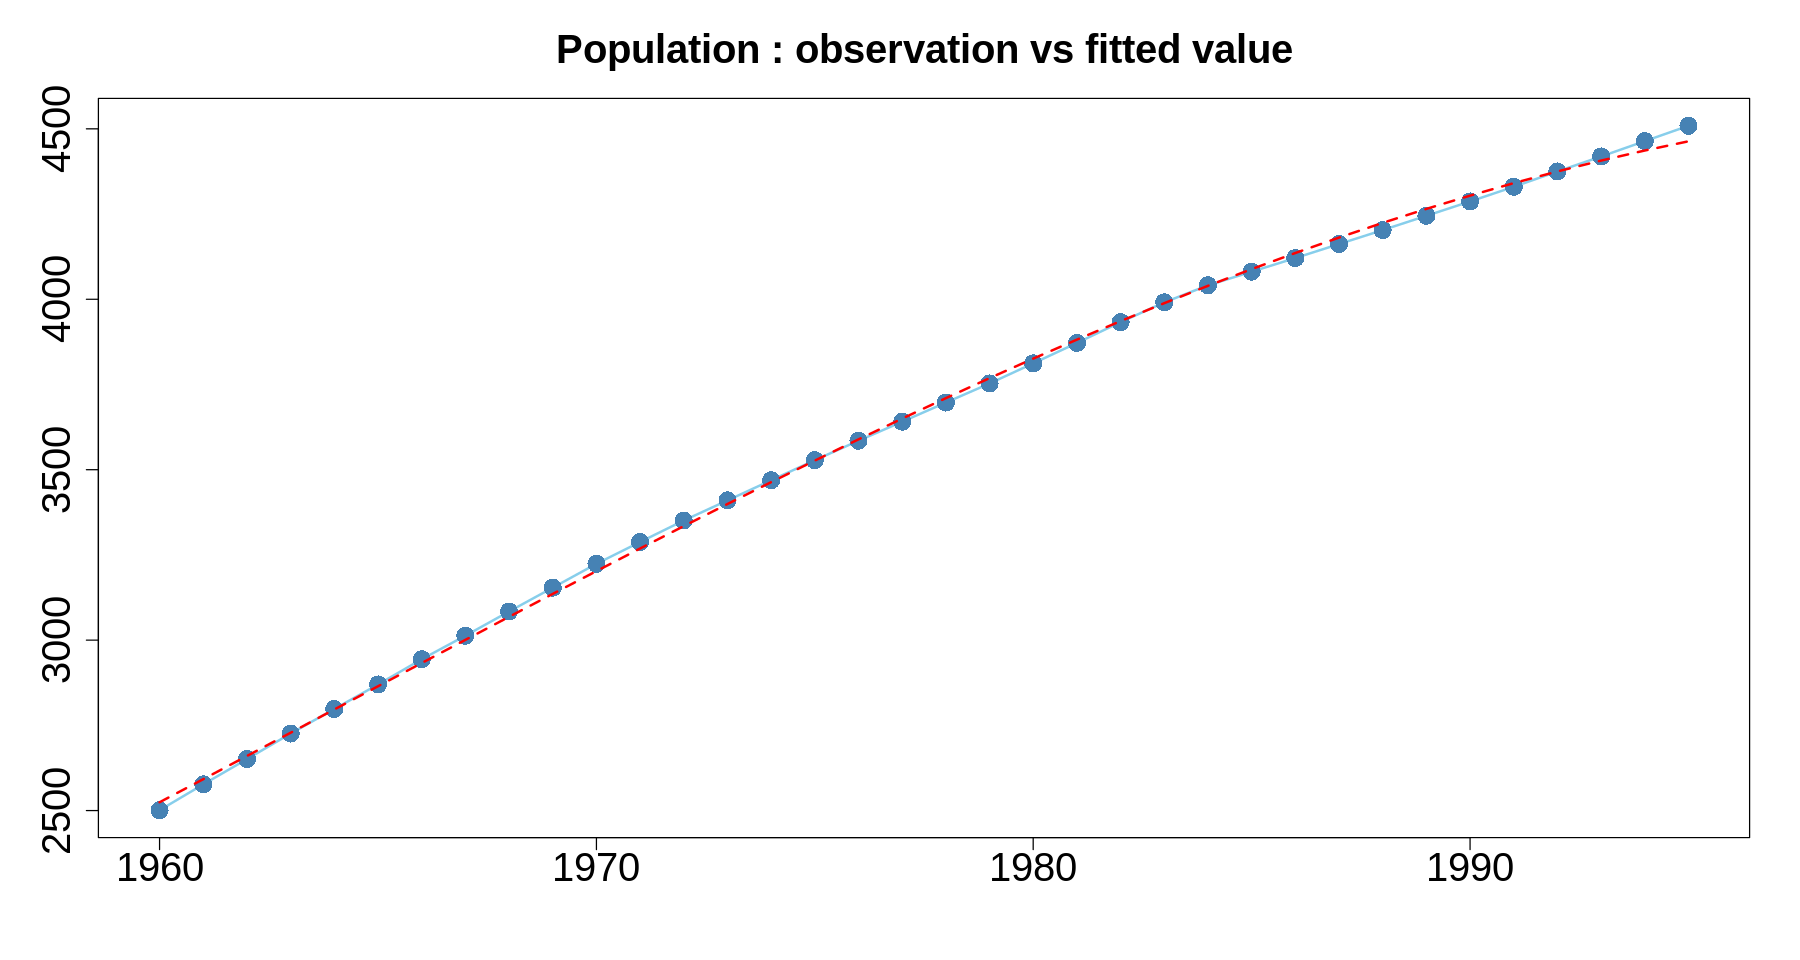

In [63]:
plot(pop~day,tmp.data,
    main="Population : observation vs fitted value",
    xlab="",ylab="",
    type="l",
    col="skyblue",
    lwd=2,cex.axis=2,cex.main=2)+
      points(pop~day,tmp.data,col="steelblue",cex=2,pch=16)+
      lines(tmp.data$day,exp(fitted(m3)),col="red",lty=2,lwd=2)

### 잔차분석

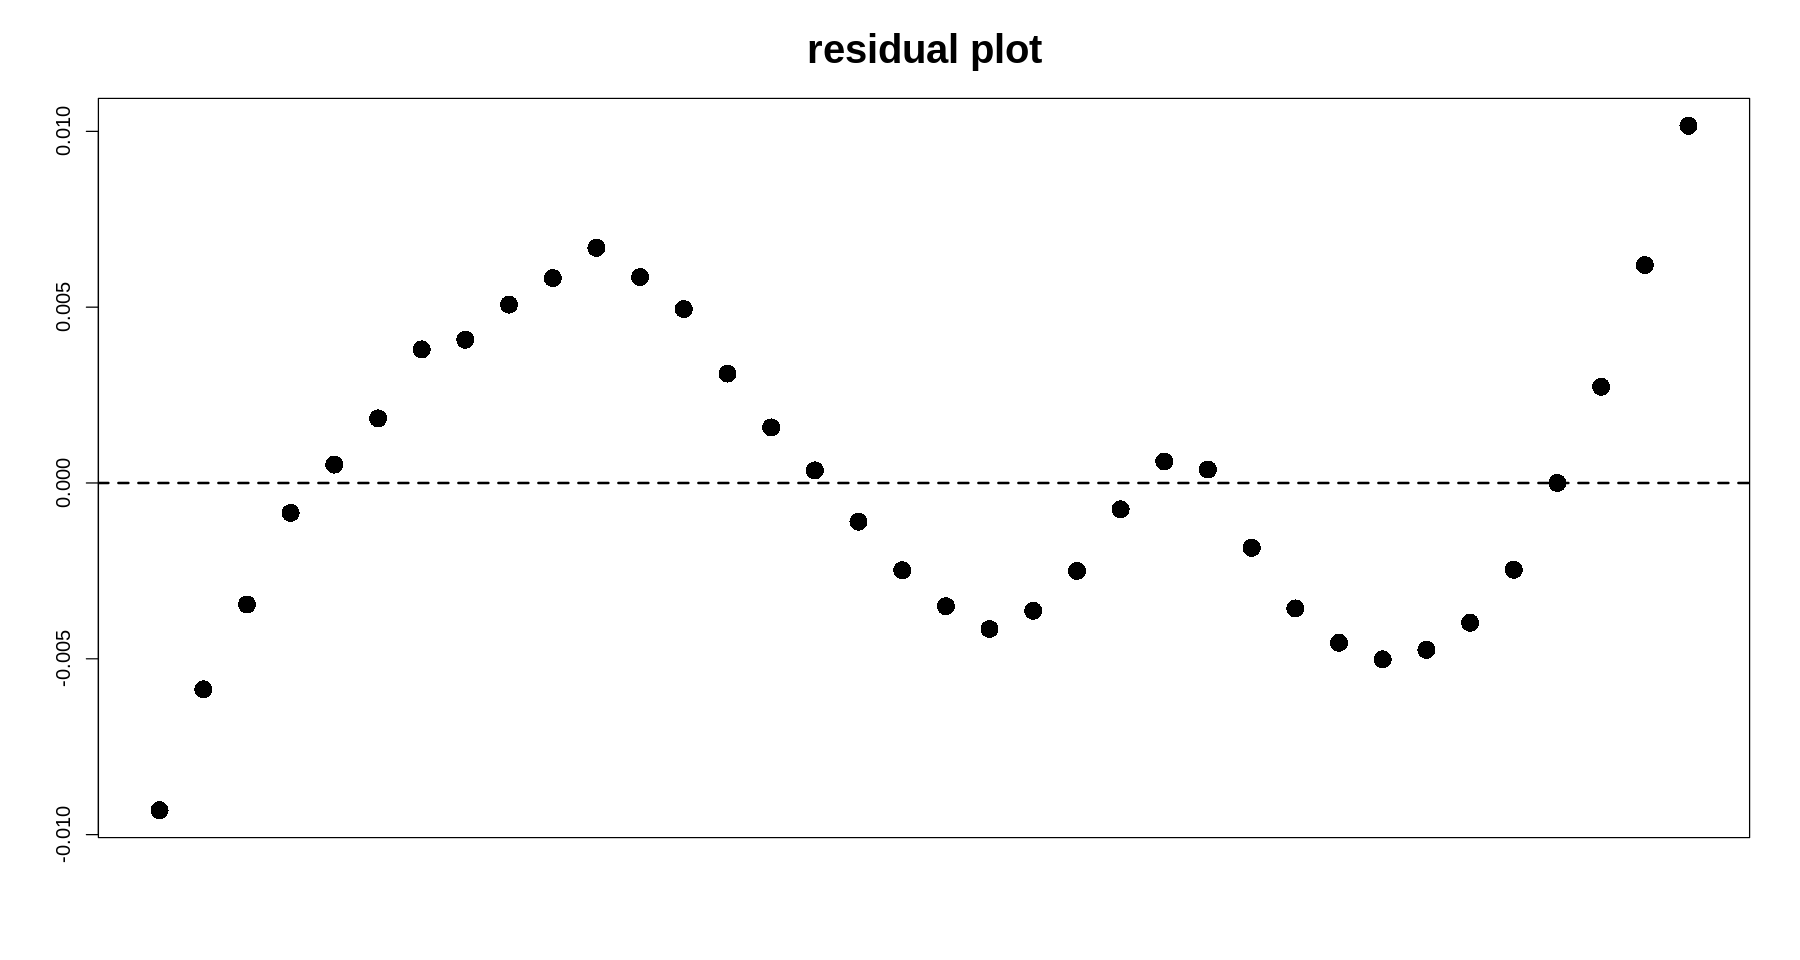

In [65]:
plot(tmp.data$day,resid(m3),
    pch=16,cex=2,xaxt='n',
    xlab="",ylab="",main="residual plot",cex.main=2)
abline(h=0,lty=2,lwd=2)

- 독립성 검ㅈ어

In [66]:
dwtest(m3,alternative="two.sided")


	Durbin-Watson test

data:  m3
DW = 0.16493, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


In [67]:
dwtest(m3,alternative="greater")


	Durbin-Watson test

data:  m3
DW = 0.16493, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


- 정규성 검정

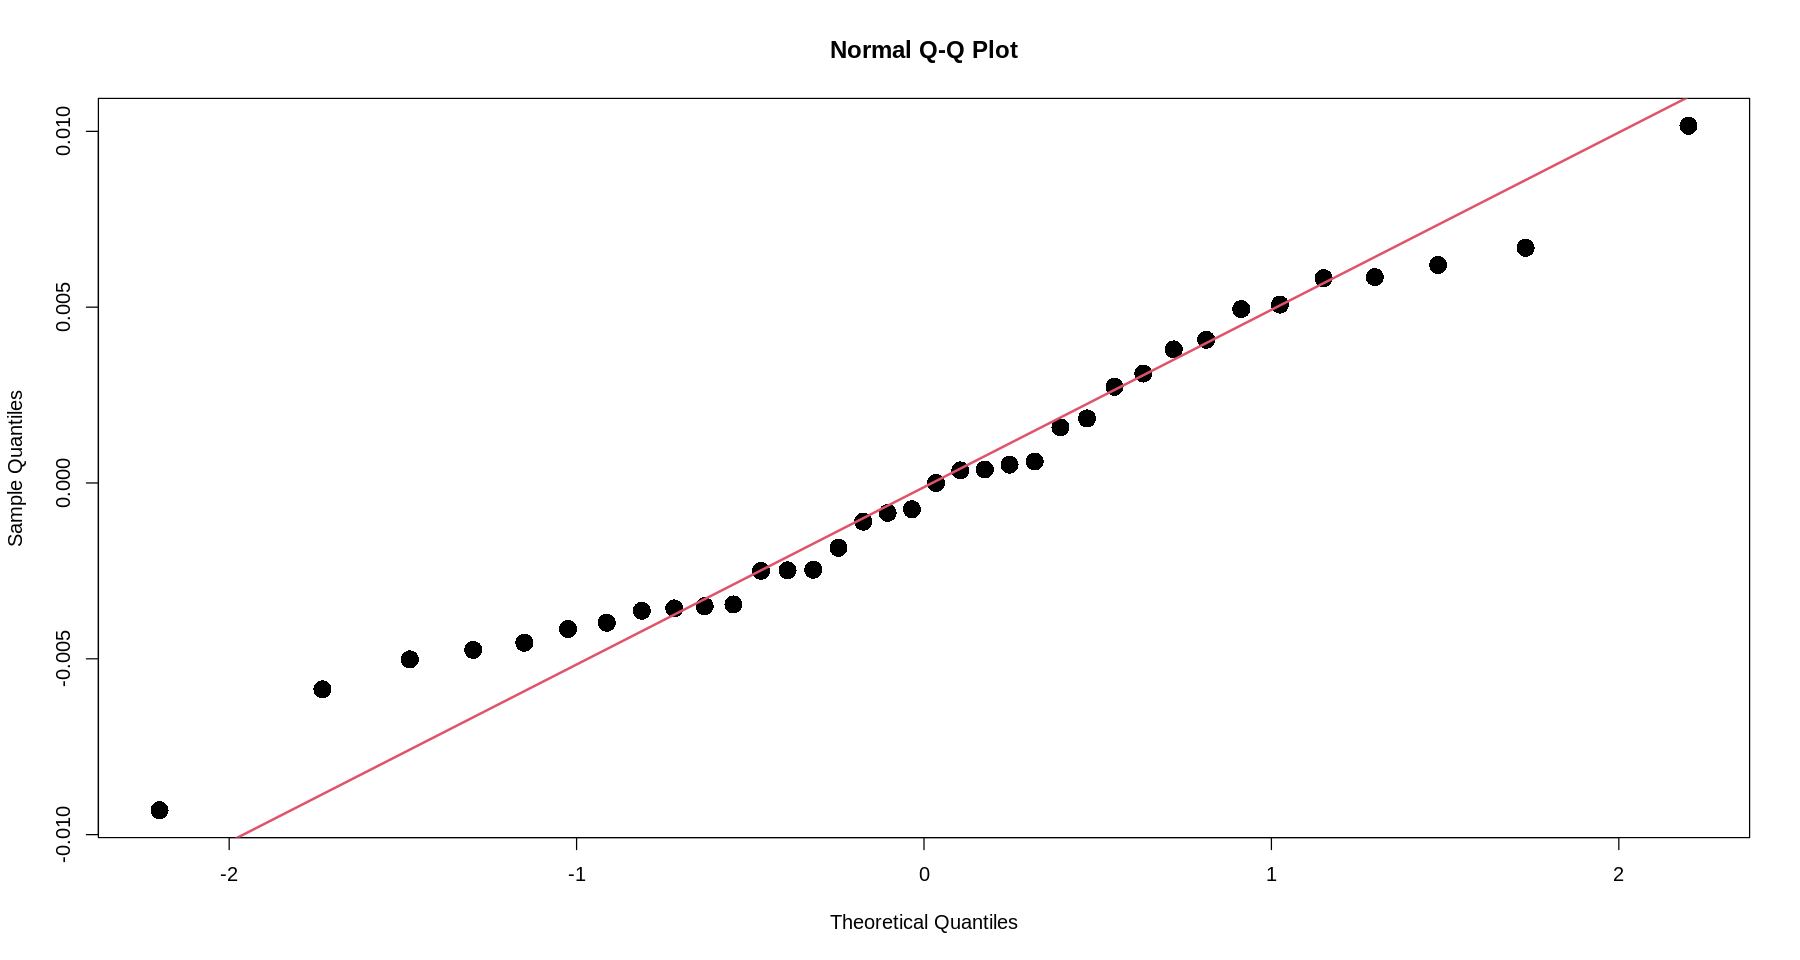

In [68]:
qqnorm(resid(m3),pch=16,cex=2)
qqline(resid(m3),col=2,lwd=2)

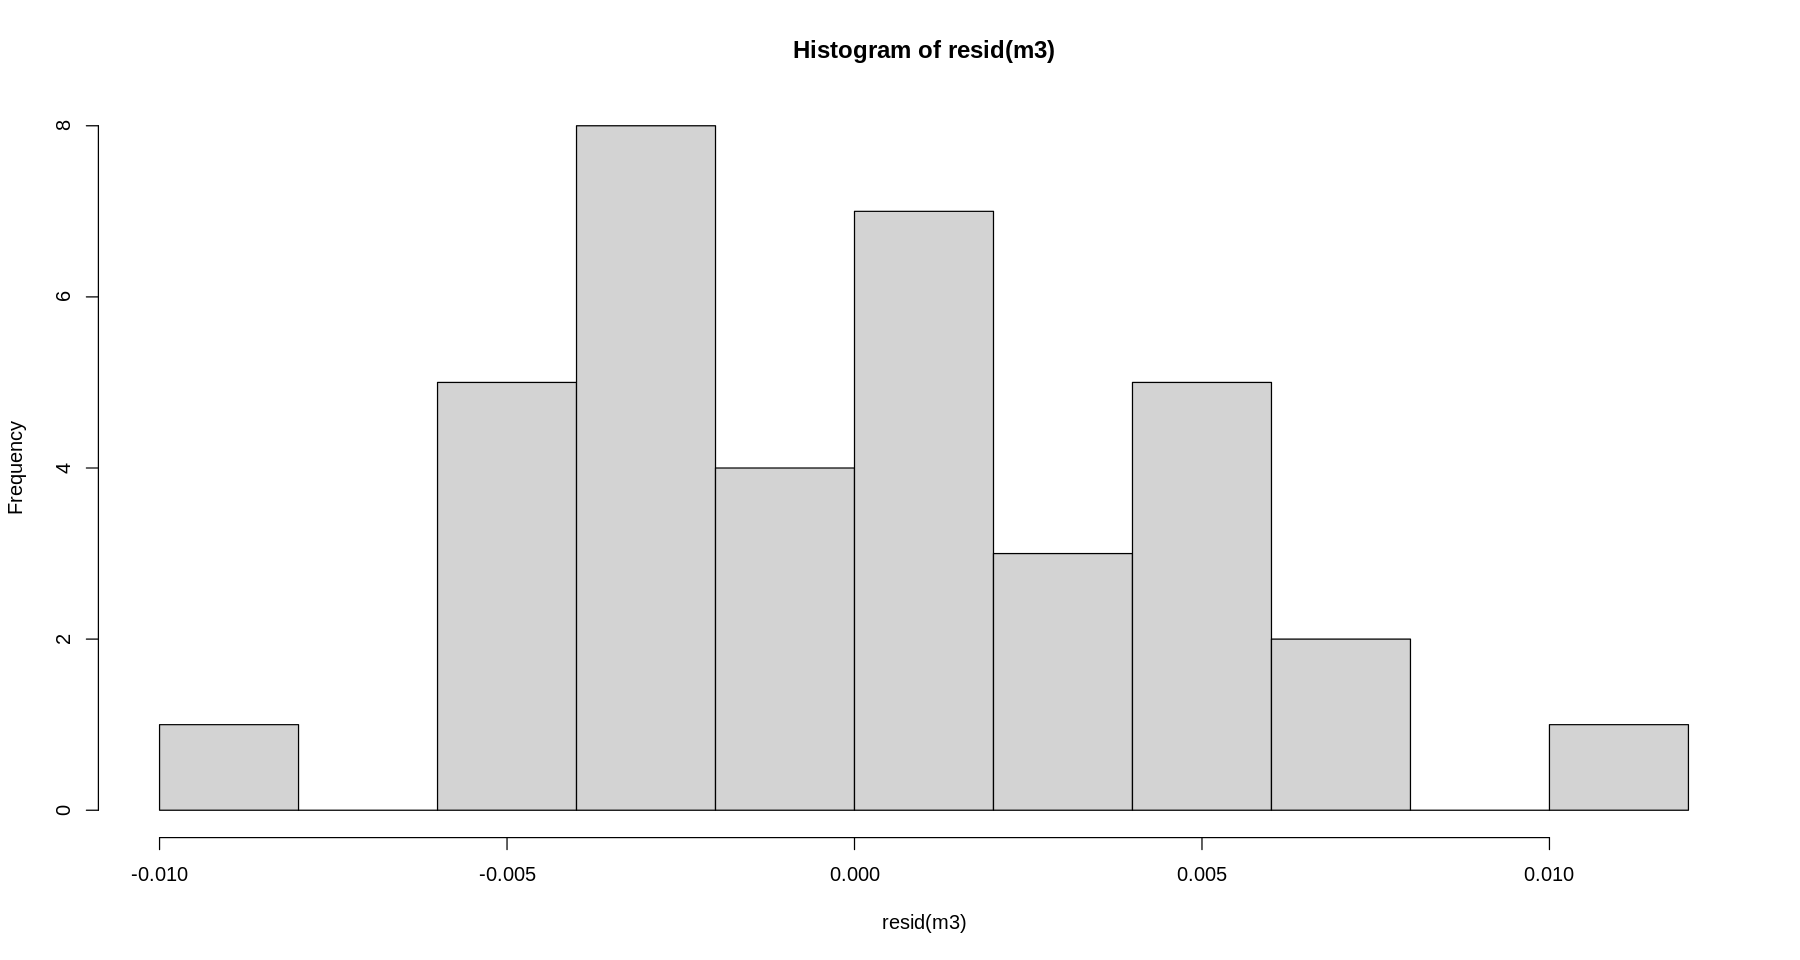

In [69]:
hist(resid(m3))

In [71]:
shapiro.test(resid(m3)) ### 정규성 만족


	Shapiro-Wilk normality test

data:  resid(m3)
W = 0.97547, p-value = 0.5922


- 등분산성 검정

In [72]:
bptest(m3)


	studentized Breusch-Pagan test

data:  m3
BP = 8.8866, df = 2, p-value = 0.01176
